ADF Statistic: -11.416591012979156
p-value: 7.037823016875531e-21
ADF Statistic after differencing: -11.416591012979156
p-value after differencing: 7.037823016875531e-21
Interpretation: The series is Stationary.


/tmp/ipykernel_54099/1242627165.py:24: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method='ffill', inplace=True)  # fill missing values


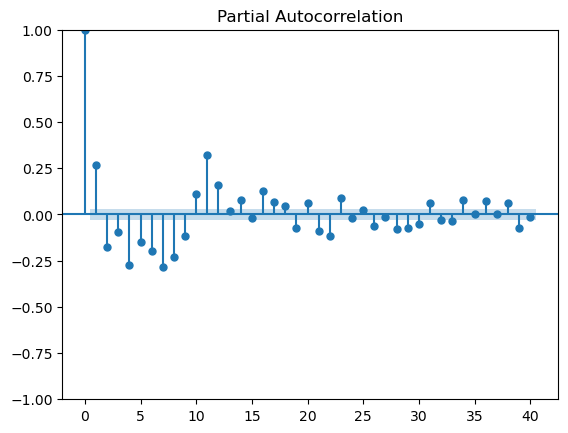

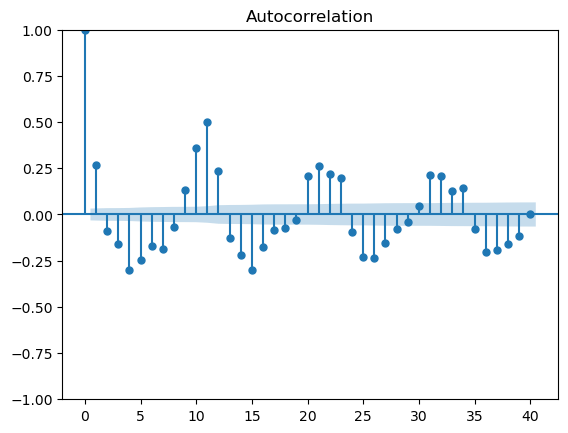

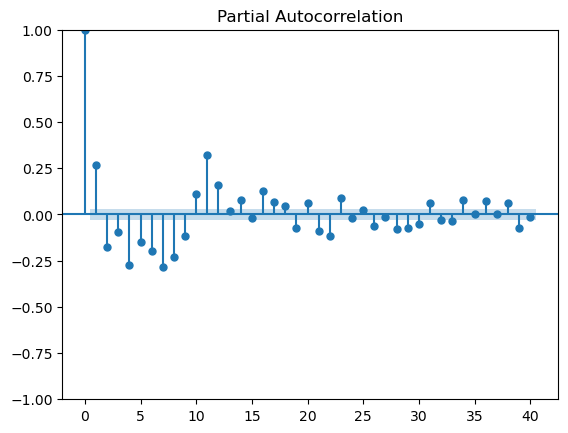

In [6]:
#https://www.datacamp.com/tutorial/arima

import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

name = "Open"

data = pd.read_csv("data/future-gc00-daily-prices.csv", index_col="Date")
# Convert index to datetime if it's not already
data.index = pd.to_datetime(data.index)

# Sort by date in ascending order (oldest to newest)
time_series_df = data.sort_index()

data[name] = data[name].replace(',', '', regex=True)
result = adfuller(data[name])
print(f"ADF Statistic: {result[0]}")
print(f"p-value: {result[1]}")

data.fillna(method='ffill', inplace=True)  # fill missing values


if result[1] > 0.05:  
    data[name] = data[name].diff().dropna()
result = adfuller(data[name])
stationarity_interpretation = "Stationary" if result[1] < 0.05 else "Non-Stationary"

print(f"ADF Statistic after differencing: {result[0]}")
print(f"p-value after differencing: {result[1]}")
print(f"Interpretation: The series is {stationarity_interpretation}.")

plot_acf(data[name], lags=40)
plot_pacf(data[name], lags=40)